Dear Participant,

Parkinson’s Disease (PD) is a degenerative neurological disorder marked by decreased dopamine levels in the brain. It manifests itself through a deterioration of movement, including the presence of tremors and stiffness. There is commonly a marked effect on speech, including dysarthria (difficulty articulating sounds), hypophonia (lowered volume), and monotone (reduced pitch range). Additionally, cognitive impairments and changes in mood can occur, and risk of dementia is increased.

Traditional diagnosis of Parkinson’s Disease involves a clinician taking a neurological history of the patient and observing motor skills in various situations. Since there is no definitive laboratory test to diagnose PD, diagnosis is often difficult, particularly in the early stages when motor effects are not yet severe. Monitoring progression of the disease over time requires repeated clinic visits by the patient. An effective screening process, particularly one that doesn’t require a clinic visit, would be beneficial. Since PD patients exhibit characteristic vocal features, voice recordings are a useful and non-invasive tool for diagnosis. If machine learning algorithms could be applied to a voice recording dataset to accurately diagnosis PD, this would be an effective screening step prior to an appointment with a clinician.

Use the provided dataset in order to do your analysis.

#Attribute Information:

#Matrix column entries (attributes):
#name - ASCII subject name and recording number
#MDVP:Fo(Hz) - Average vocal fundamental frequency
#MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
#MDVP:Flo(Hz) - Minimum vocal fundamental frequency
#MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several 
#measures of variation in fundamental frequency
#MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
#NHR,HNR - Two measures of ratio of noise to tonal components in the voice
#status - Health status of the subject (one) - Parkinson's, (zero) - healthy
#RPDE,D2 - Two nonlinear dynamical complexity measures
#DFA - Signal fractal scaling exponent
#spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation

In [1]:
# Import required library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Q1. Load the dataset 

In [3]:
df=pd.read_csv('parkinson.csv')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


### Q2. Use the .describe() method on the dataset and state any insights you may come across.

In [4]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


with the mean and media values of features like MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:PPQ it can be said that they are skewed 

### Q3. Check for class imbalance. Do people with Parkinson's have greater representation in the dataset?

In [5]:
#Class imbalance check
#status -(one) - Parkinson's, (zero) - healthy
df['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

Yes, people with parkinson's disease have greater representation in the data, let us verify that through percentage.

In [6]:
print('Percentage of people with Parkinson :',((df['status']==1).sum()/(df['status']).count())*100)
print('Percentage of healthy people :',((df['status']==0).sum()/(df['status']).count())*100)

Percentage of people with Parkinson : 75.38461538461539
Percentage of healthy people : 24.615384615384617


### Q4. Check for missing vaues and take necessary measures by dropping observation or imputing them.

In [7]:
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

There are no missing values found

### Q5. Plot the distribution of all the features. State any observations you can make based on the distribution plots.

In [8]:
df.head(2)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674


In [9]:
df1=df.drop('name',axis=1)

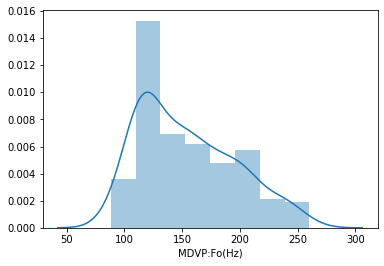

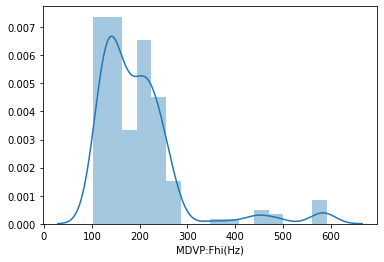

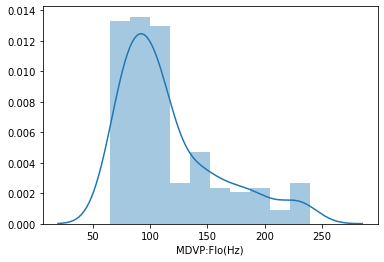

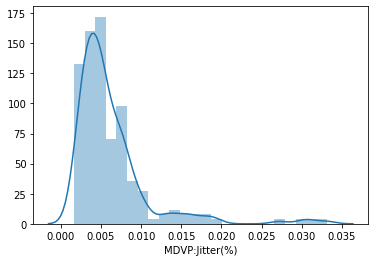

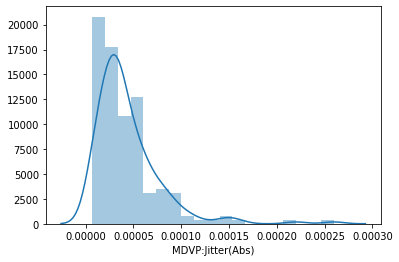

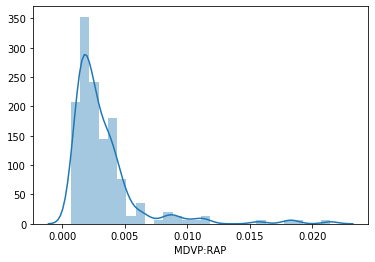

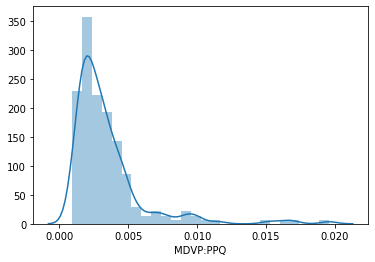

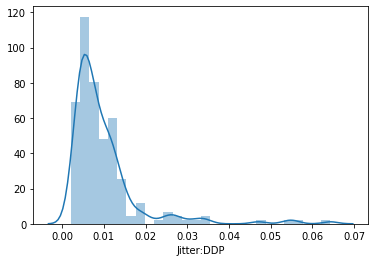

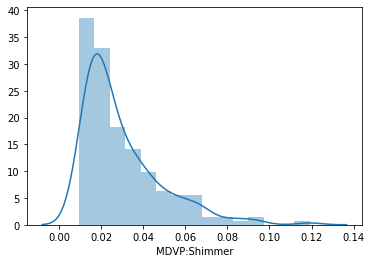

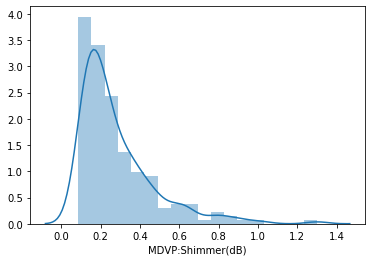

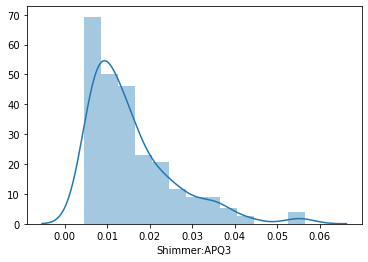

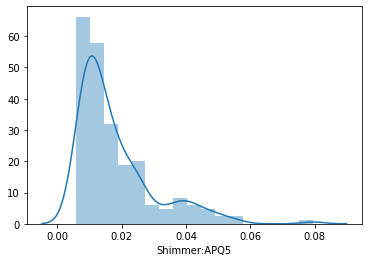

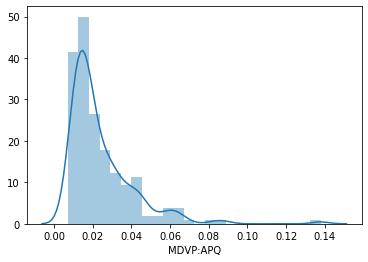

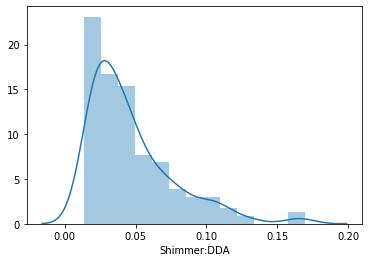

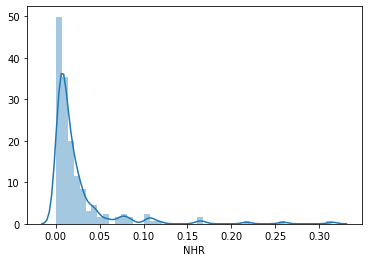

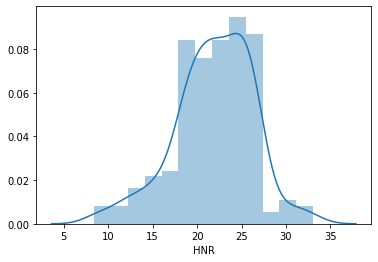

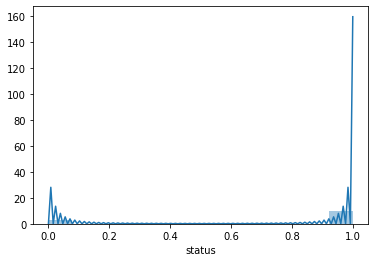

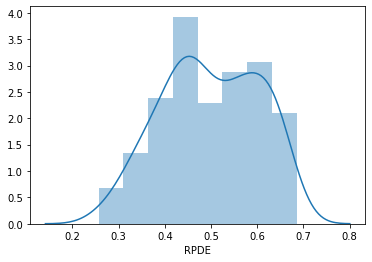

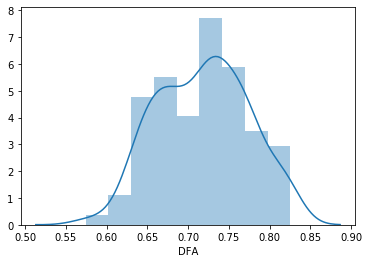

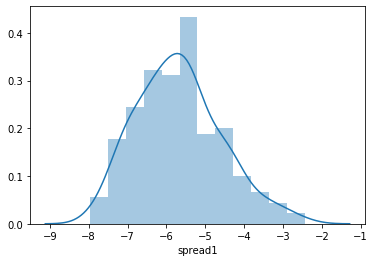

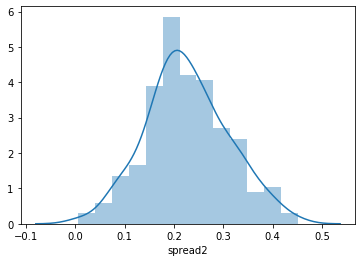

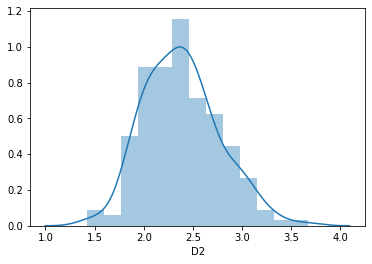

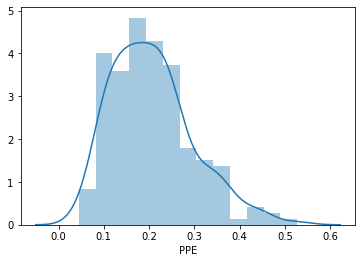

In [10]:
for i in df1.columns:
    sns.distplot(df1[i])
    plt.show()

Some of the features like MDVP:Fhi(Hz),MDVP:Jitter(%),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer(dB),MDVP:APQ,NHR are skewed

### Q6. Check for outliers in the data. Are there any variables with high amount of outliers.

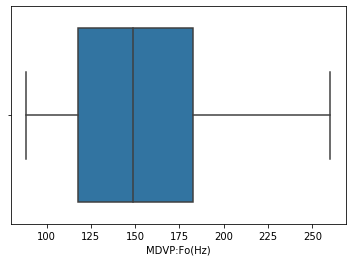

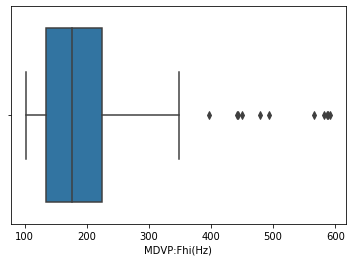

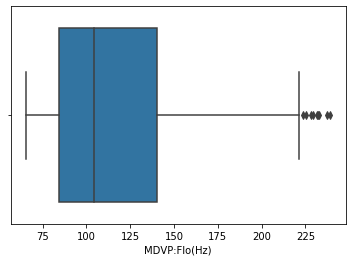

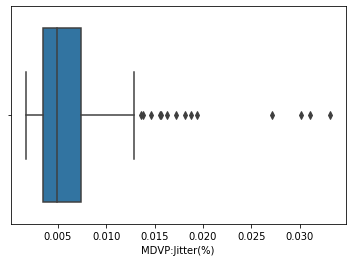

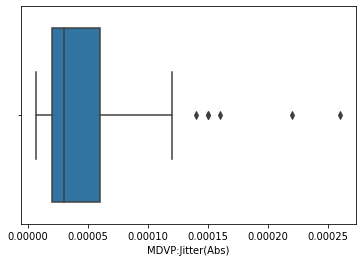

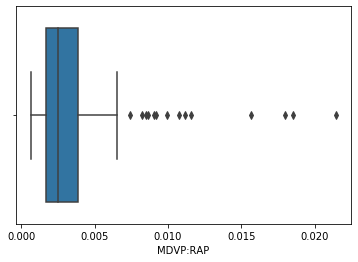

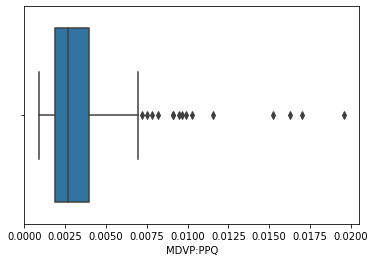

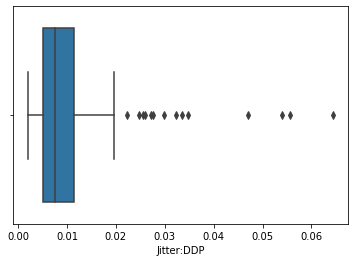

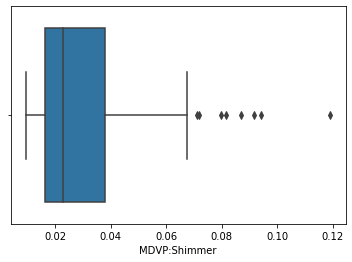

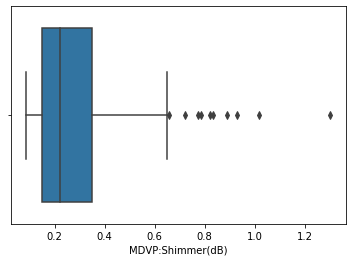

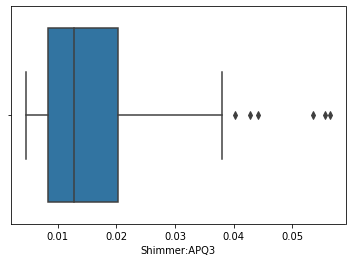

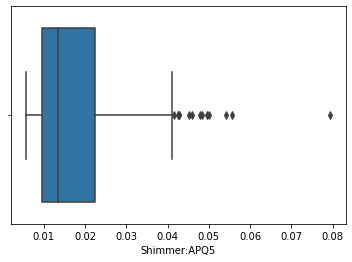

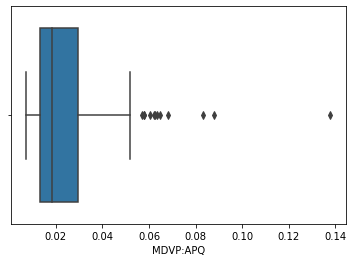

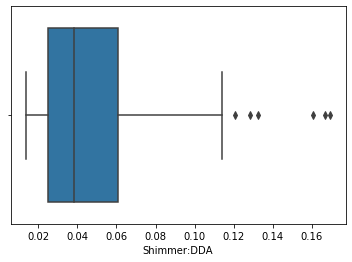

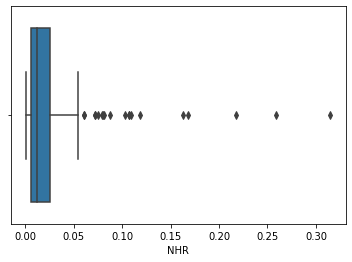

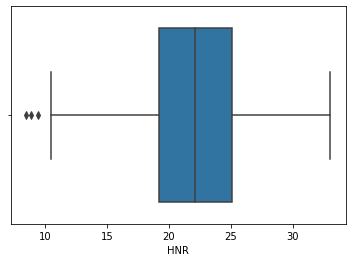

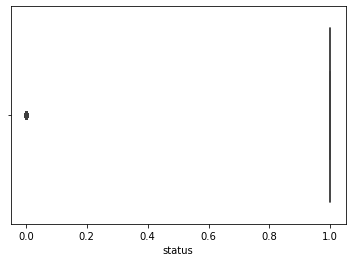

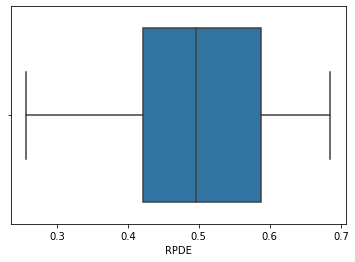

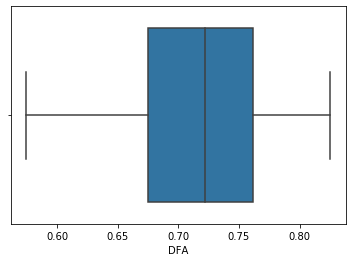

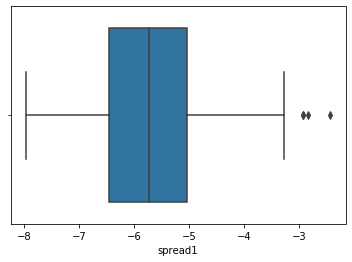

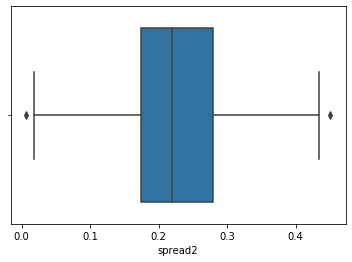

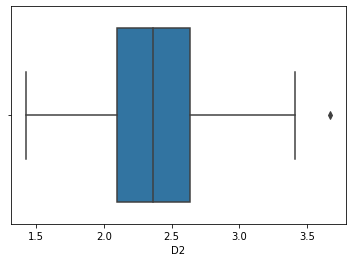

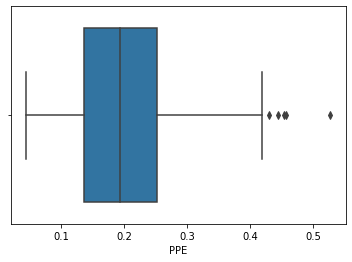

In [11]:
for i in df1.columns:
    sns.boxplot(df1[i])
    plt.show()

High outliers are seen MDVP:Fhi(Hz),MDVP:Jitter(%),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer(dB),MDVP:APQ,NHR

### Q7. Are there any strong correlations among the independent features?

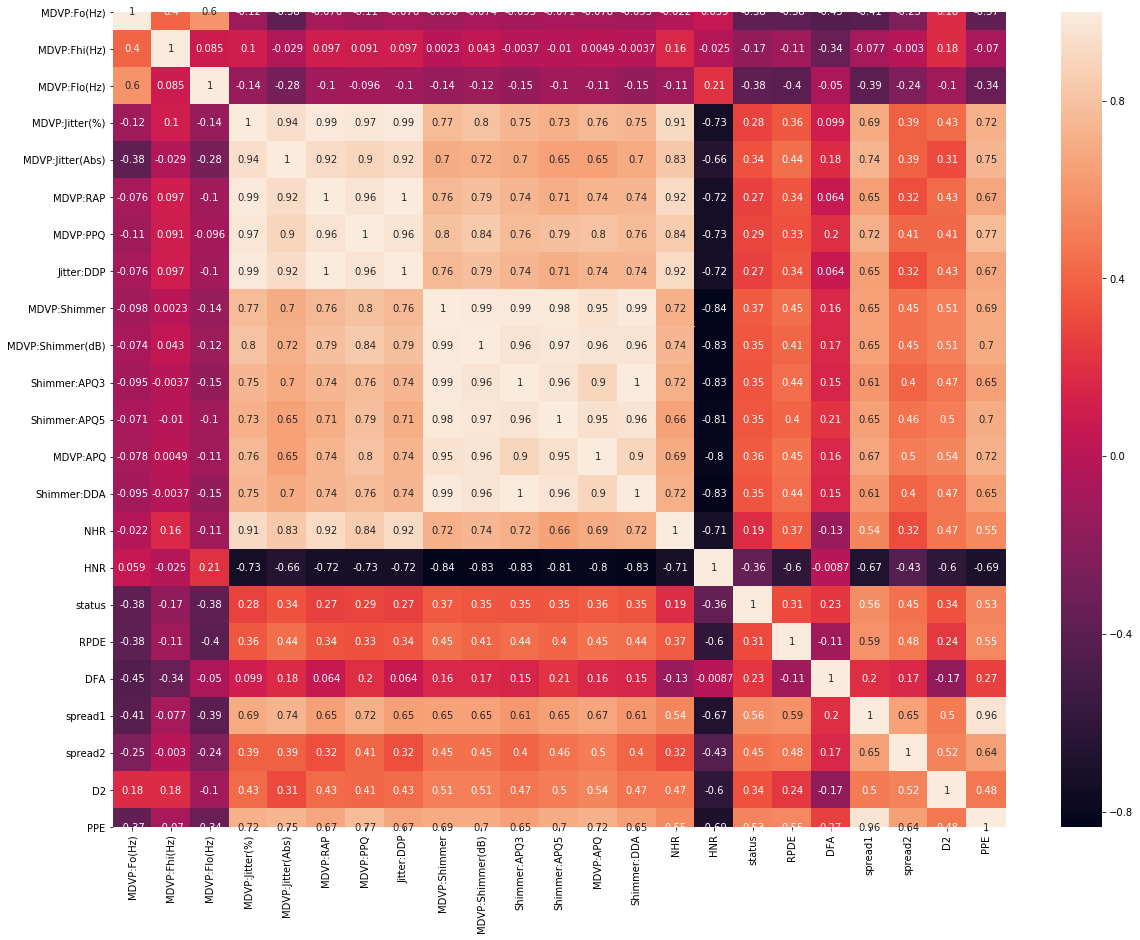

In [12]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr() ,annot=True)
plt.show()

Among independent variables strong correlation is seen between

0.99 = Jitter:DDP and MDVP:Jitter%
        
0.97 = MDVP:PPQ and MDVP:Jitter%

0.99 = MDVP:RAP and MDVP:Jitter%

0.96 = MDVP:PPQ  and MDVP:RAP

### Q8. Split dataset into training & test dataset  

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
x=df1.drop('status',axis=1)
x_scaler=StandardScaler()
x_std=x_scaler.fit_transform(x)
y=df1['status']
xtrain,xtest,ytrain,ytest=train_test_split(x_std,y,random_state=0,test_size=0.3)

### Q9. Create a default decision tree model using criterion = Entropy 

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score,KFold
dt_model=DecisionTreeClassifier(criterion='entropy',random_state=0) #Fully Grown DT
#Fully grown Decision Tree
kf=KFold(shuffle=True,n_splits=3,random_state=0)
fgdt_score=cross_val_score(dt_model,x_std,y,cv=kf,scoring='roc_auc')
print('roc_auc :',np.mean(fgdt_score))
print('Bias error :',np.mean(1-fgdt_score))
print('Variance error :',np.std(fgdt_score))

roc_auc : 0.8073330598448379
Bias error : 0.19266694015516198
Variance error : 0.07849060600975104


### Q10.  Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help? 

In [15]:
#Perform Grid Search Method to find the optimal max_depth size
from sklearn.model_selection import GridSearchCV
parameter={'max_depth':np.arange(1,10),'criterion' : ['entropy','gini'],'min_samples_leaf':np.arange(3,20)}
#kf=KFold(shuffle=True,n_splits=3,random_state=0)
GS=GridSearchCV(dt_model,parameter,cv=5,scoring='roc_auc')
GS.fit(x_std,y)
GS.best_params_

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 16}

In [16]:
#Regularised Decision Tree
dt_reg=DecisionTreeClassifier(max_depth=3,criterion='entropy',random_state=0,min_samples_leaf=16) #Regularised Decision tree
kf=KFold(shuffle=True,n_splits=3,random_state=0)
rdt_score=cross_val_score(dt_reg,x_std,y,cv=kf,scoring='roc_auc')
print('roc_auc :',np.mean(rdt_score))
print('Bias error :',np.mean(1-rdt_score))
print('Variance error :',np.std(rdt_score,ddof=1))

roc_auc : 0.8402494386007645
Bias error : 0.15975056139923552
Variance error : 0.06224772337074116


In [17]:
from sklearn.metrics import accuracy_score
dt_reg.fit(xtrain,ytrain)
ypred=dt_reg.predict(xtest)
print('Acccuracy of regularised model:',accuracy_score(ytest, ypred))

Acccuracy of regularised model: 0.7288135593220338


In [18]:
from sklearn.metrics import accuracy_score
dt_model.fit(xtrain,ytrain)
ypred=dt_model.predict(xtest)
print('Acccuracy of fully grown model:',accuracy_score(ytest, ypred))

Acccuracy of fully grown model: 0.8983050847457628


In comparision with fully grown decision tree the regularised decision tree has low variance error, low bias error and more area under the curve

### Q11. Implement a Random Forest model. What is the optimal number of trees that gives the best result?

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
RF_var=[]
RF_b=[]
for val in np.arange(1,100):
  RF=RandomForestClassifier(n_estimators=val,random_state=0)
  kfold =KFold(shuffle=True,n_splits=3,random_state=0)
  cv_results = cross_val_score(RF, x_std, y,cv=kfold, scoring='roc_auc')
  RF_var.append(np.std(cv_results,ddof=1))
  RF_b.append(np.mean(1-cv_results))


In [21]:
np.argmin(RF_b),np.argmin(RF_var)

(18, 16)

In [22]:
RF=RandomForestClassifier(n_estimators=17,random_state=0)
kfold =KFold(shuffle=True,n_splits=3,random_state=0)
RF_score = cross_val_score(RF, x_std, y,cv=kfold, scoring='roc_auc')
print('roc_auc :',np.mean(RF_score))
print('Bias error :',np.mean(1-RF_score))
print('Variance error :',np.std(RF_score,ddof=1))

roc_auc : 0.9544656611691206
Bias error : 0.045534338830879394
Variance error : 0.027163557443221936


n_estimator 17 gives us the best result in terms of both bias and variance error

Let us also compare all the three models used above

In [23]:
print('Fully grown decision tree')
print('\nroc_auc :',np.mean(fgdt_score))
print('Bias error :',np.mean(1-fgdt_score))
print('Variance error :',np.std(fgdt_score))
print('\nRegularised deccision tree')
print('\nroc_auc :',np.mean(rdt_score))
print('Bias error :',np.mean(1-rdt_score))
print('Variance error :',np.std(rdt_score,ddof=1))
print('\nRandom forest')
print('\nroc_auc :',np.mean(RF_score))
print('Bias error :',np.mean(1-RF_score))
print('Variance error :',np.std(RF_score,ddof=1))

Fully grown decision tree

roc_auc : 0.8073330598448379
Bias error : 0.19266694015516198
Variance error : 0.07849060600975104

Regularised deccision tree

roc_auc : 0.8402494386007645
Bias error : 0.15975056139923552
Variance error : 0.06224772337074116

Random forest

roc_auc : 0.9544656611691206
Bias error : 0.045534338830879394
Variance error : 0.027163557443221936
